In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

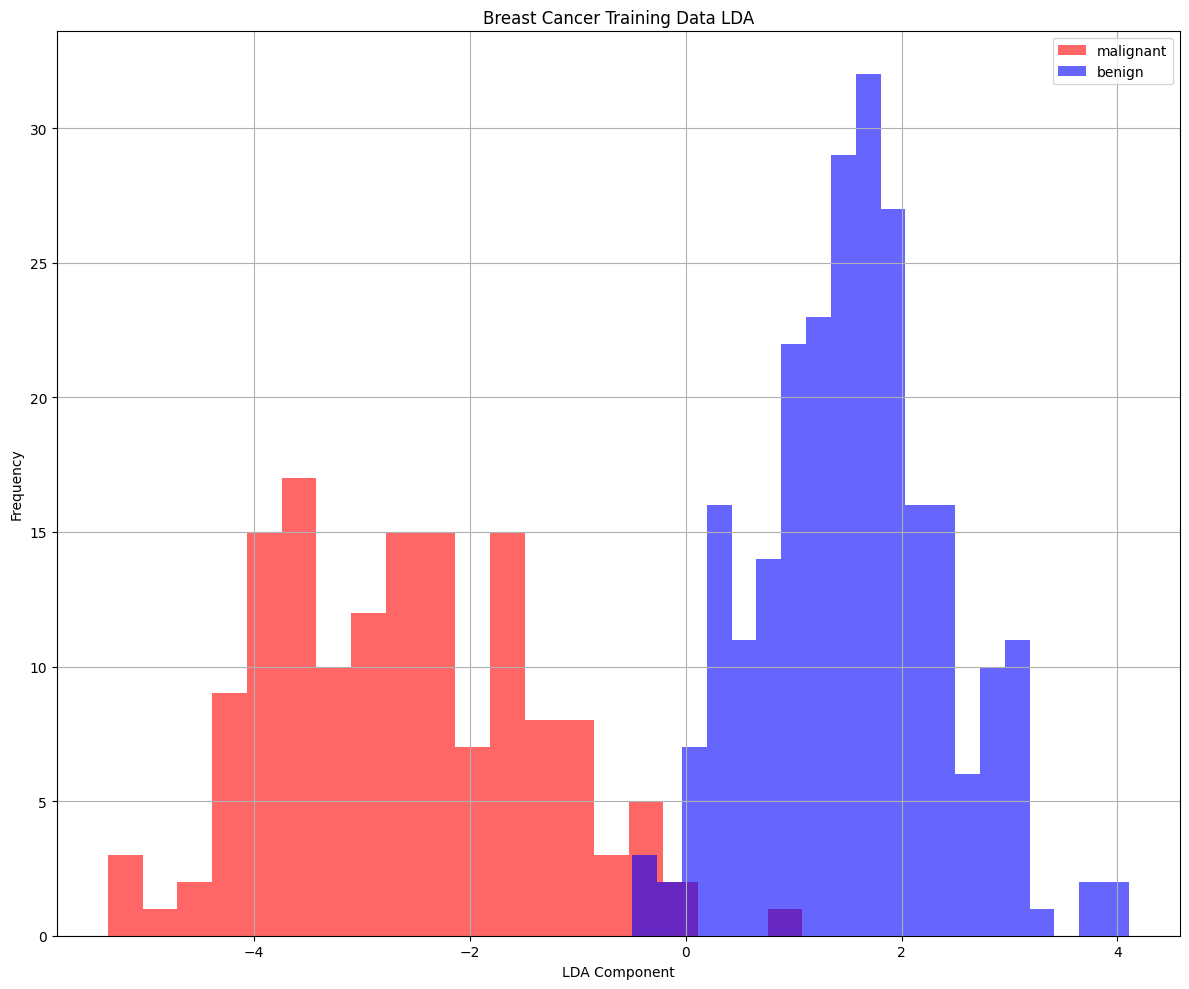

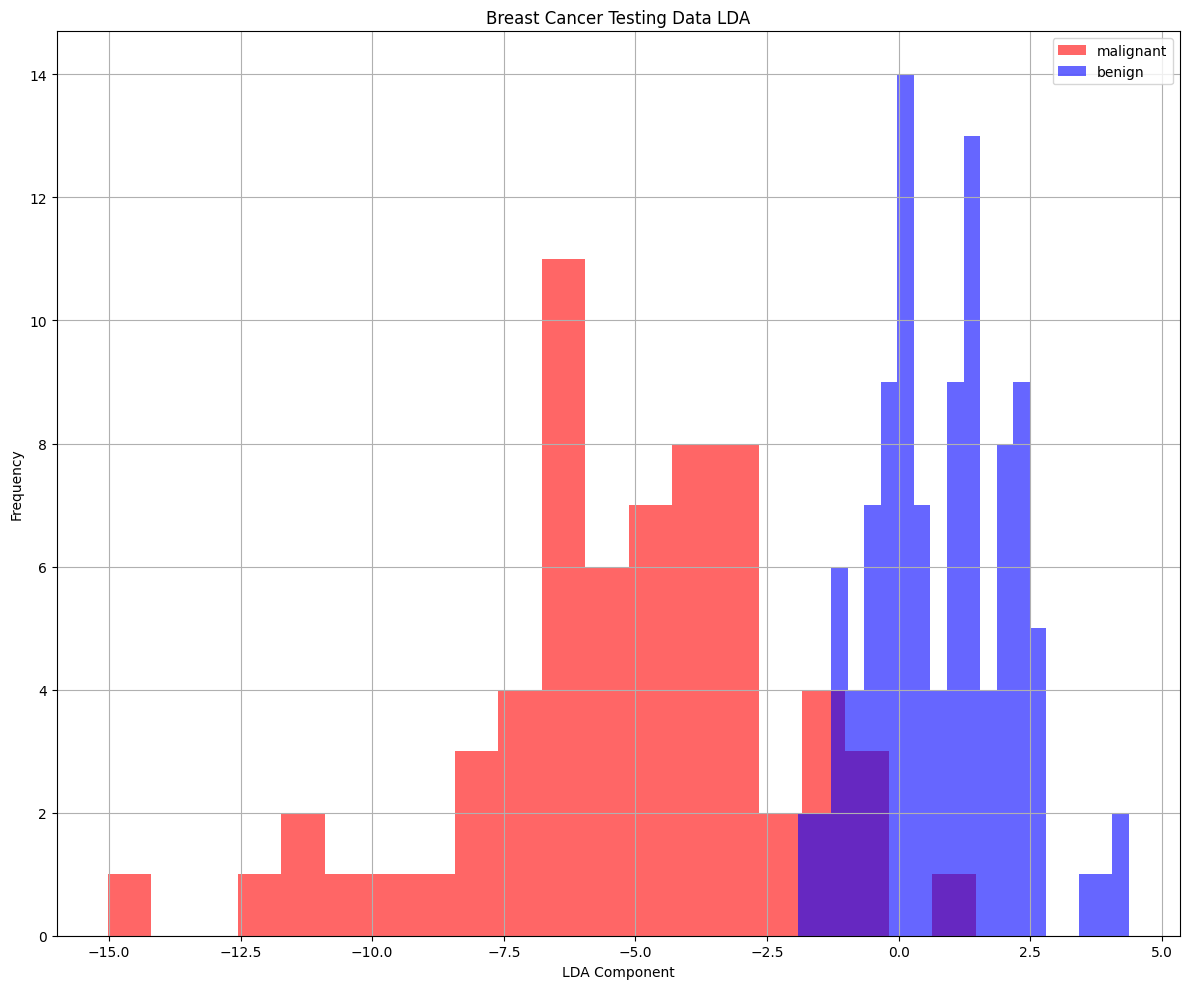

[I 2025-04-27 06:23:33,526] A new study created in memory with name: no-name-086f9713-aba6-425b-87f3-8e0967df568d
[I 2025-04-27 06:28:01,014] Trial 0 finished with value: 0.9749367088607596 and parameters: {'n_estimators': 8630, 'learning_rate': 0.03826944806279633, 'num_leaves': 80, 'max_depth': 6, 'min_child_samples': 12, 'subsample': 0.729155910584032, 'colsample_bytree': 0.7247346791322774, 'reg_alpha': 4.549272723776498e-08, 'reg_lambda': 1.1931825328248702e-07}. Best is trial 0 with value: 0.9749367088607596.
[I 2025-04-27 06:28:33,051] Trial 1 finished with value: 0.977373417721519 and parameters: {'n_estimators': 1947, 'learning_rate': 0.005071550054384299, 'num_leaves': 54, 'max_depth': 5, 'min_child_samples': 100, 'subsample': 0.9753376149583807, 'colsample_bytree': 0.7897327572821697, 'reg_alpha': 6.543137185875373e-05, 'reg_lambda': 2.291533865791374}. Best is trial 1 with value: 0.977373417721519.
[I 2025-04-27 06:31:41,522] Trial 2 finished with value: 0.9824367088607595 

Best trial:
Accuracy: 0.9874050632911393
Best hyperparameters:  {'n_estimators': 5715, 'learning_rate': 0.002216453742838958, 'num_leaves': 29, 'max_depth': 12, 'min_child_samples': 92, 'subsample': 0.6513517803907748, 'colsample_bytree': 0.94594564537488, 'reg_alpha': 5.640794953113939, 'reg_lambda': 0.04962146342444535}


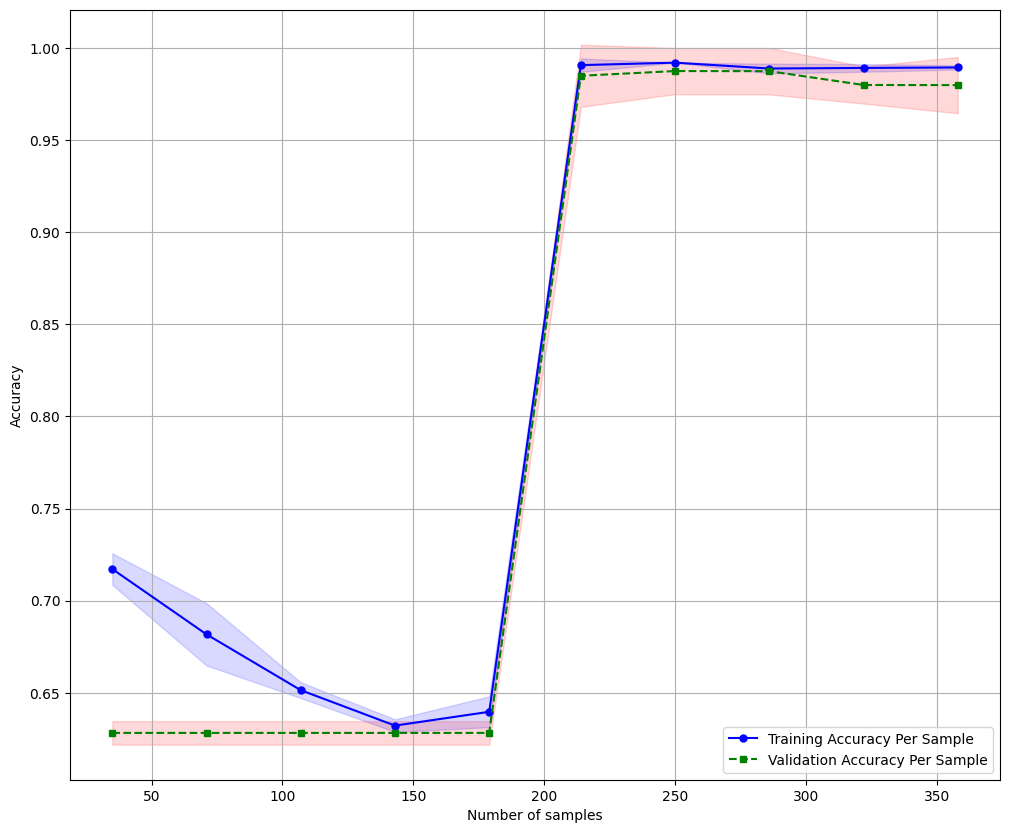

Confusion Matrix
[[62  2]
 [21 86]]
Accuracy: 0.8655, Precision: 0.9773, Recall: 0.8037, F1: 0.8821, AUC: 0.9214


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)